<center>
    
# Python For Quantum Mechanics
# Week 6: Exercises

</center>

## Exercise 1: Higher-Dimensional Hadamard Gate
Suppose we have a column vector that describes the state of two qubits
$$\begin{bmatrix}|q_1> \\|q_2> \end{bmatrix} = \begin{bmatrix}1 \\0 \\0 \\1 \end{bmatrix}$$
Construct a four-dimensional matrix, that when multiplied by this vector, applies a hadamard gate to each qubit.

In [2]:
import scipy
import scipy.linalg as linalg
import scipy.optimize as opt
from scipy.fft import fft, fftfreq, fftshift

import numpy as np
import numpy.random as rnd

import matplotlib.pyplot as plt

In [3]:
Q = np.array([[1],[0],[0],[1]])

n=2
H = 1/(np.sqrt(n))*linalg.hadamard(n)

H = (scipy.sparse.kron(np.eye(2),H)).todense()

print('H = \n', H, '\n')

print('HQ = \n', H@Q)

H = 
 [[ 0.70710678  0.70710678  0.          0.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.          0.          0.70710678  0.70710678]
 [ 0.          0.          0.70710678 -0.70710678]] 

HQ = 
 [[ 0.70710678]
 [ 0.70710678]
 [ 0.70710678]
 [-0.70710678]]


## Exercise 2: Multi-Qubit States

We can represent two qubits as one collective state, rather than two seperate states as above
$$|q_1> = x_0|0> + x_1|1>$$
$$|q_2> = y_0|0> + y_1|1>$$

$$|q_1q_2> = a_{00}|00> + a_{01}|01> + a_{10}|10> + a_{11}|11>$$

where

$$|q_1q_2> = |q_1>\otimes|q_2> = \begin{bmatrix} x_0\\x_1 \end{bmatrix} \otimes \begin{bmatrix} y_0\\y_1 \end{bmatrix} = \begin{bmatrix} x_0\times \begin{bmatrix} y_0\\y_1 \end{bmatrix}\\x_1 \times \begin{bmatrix} y_0\\y_1 \end{bmatrix}\end{bmatrix} = \begin{bmatrix} x_0\times y_0\\x_0\times y_1\\x_1\times y_0\\x_1\times y_1 \end{bmatrix}= \begin{bmatrix} a_{00}\\a_{01}\\a_{10}\\a_{11} \end{bmatrix}$$

Quantum gates are then applied, via tensor products, to the multi-qubit state. For example, applying a Hadamard to each individual state turns to a tensor product of Hadamard gates when applied to the multi-qubit state:

$$(H|q_1>)\otimes(H|q_1>) = (H\otimes H)\times(|q_1>\otimes|q_2>) = (H\otimes H)\times |q_1q_2> $$

Given the following qubit states, construct their corresponding multi-qubit state

$$|q_1> = 0|0> + 1|1>$$
$$|q_2> = \frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>$$

In [4]:
q1 = np.array([[1],[0]])
x = 1/np.sqrt(2)
q2 = np.array([[0],[1]])

Q = scipy.sparse.kron(q1,q2).toarray()

print(Q)

[[0]
 [1]
 [0]
 [0]]


Construct a four-dimensional Hadamard gate for this multi-qubit state, multiply and find the result.

In [5]:
n=4
H = (1/np.sqrt(n))*linalg.hadamard(n)

print('H = \n', H, '\n')

print('HQ = \n', H@Q)

H = 
 [[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]] 

HQ = 
 [[ 0.5]
 [-0.5]
 [ 0.5]
 [-0.5]]


## Exercise 3: Spectral Decomposition

Spectrally decompose the above four dimensional Hadamard gate $H\otimes H$, finding it's eigenvectors and eigenvalues.

In [6]:
n=4
H = (1/np.sqrt(n))*linalg.hadamard(n)

print('H = \n', H, '\n')

eigval, eigvec = linalg.eig(H)

print('Eigenvalues = ',eigval, '\n')
print('Eigenvector Matrix = ',eigvec)

H = 
 [[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]] 

Eigenvalues =  [ 1.+0.j -1.+0.j -1.+0.j  1.+0.j] 

Eigenvector Matrix =  [[ 0.8660254   0.5        -0.01526703  0.02644328]
 [ 0.28867513 -0.5        -0.69151004  0.41687236]
 [ 0.28867513 -0.5         0.72204411  0.41687236]
 [ 0.28867513 -0.5         0.01526703 -0.80730144]]


Sanity check:

The state 

$$|E_2> = Eigenvector[:,1] = \frac{1}{2}|00> - \frac{1}{2}|01> - \frac{1}{2}|10> -\frac{1}{2}|11> $$

is an eigenvector of $H\otimes H$, calculate

$$(H\otimes H)\times |E_2> = \lambda_2 |E_2>$$

In [7]:
print('|E_2> = ',eigvec[:,1], '\n')

print('H|E_2> = ',H@eigvec[:,1], ' = -1|E_2> \n')

|E_2> =  [ 0.5 -0.5 -0.5 -0.5] 

H|E_2> =  [-0.5  0.5  0.5  0.5]  = -1|E_2> 



## <center>Exercise 4: Paremetrising Qubits</center>

We know that qubit states can be written in the form 

$$|\psi> = cos(\frac{\theta}{2})|0> + e^{i\phi}sin(\frac{\theta}{2})|1> $$

Given random, normalised values for the amplitudes of a qubit state, calculate the corresponding values of $\phi$ and $\theta$.

In [3]:
#psi = rnd.random((2))
psi = rnd.random((2)) + 1j*rnd.random((1))
psi[0] = psi[0].real + 0*1j

#Normalise
psi[0], psi[1] = psi[0]/np.sqrt(abs(psi[0])**2 + abs(psi[1])**2), psi[1]/np.sqrt(abs(psi[0])**2 + abs(psi[1])**2)

print('psi = ','{}|0> + {}|1> \n'.format(psi[0],psi[1]))

def p(x):
        return np.array([np.cos(x[0]/2.0),np.exp(1j*x[1])*np.sin(x[0]/2.0)])
    
def f(x):
        return np.sqrt(abs(p(x)[1]-psi[1])**2)

def parametrise(psi):
    def p(x):
        return np.array([np.cos(x[0]/2.0),np.exp(1j*x[1])*np.sin(x[0]/2.0)])


    def f(x):
        return np.sqrt(abs(p(x)[1]-psi[1])**2)

    bounds = [[0,np.pi],[0,2*np.pi]]

    result = opt.differential_evolution(f,bounds)
    
    return result

result = parametrise(psi)

print('theta = {}  phi = {}\n'.format(result.x[0],result.x[1]))

print('psi = ','{}|0> + {}|1> \n'.format(p(result.x)[0],p(result.x)[1]))

print('psi prob = {} , {}'.format(np.round(abs(psi[0])**2,2),np.round(abs(psi[1])**2,2)))

psi =  (0.3963411797205215+0j)|0> + (0.9116530511494989+0.10863877570901802j)|1> 

theta = 2.3265362396750575  phi = 0.1186074718001402

psi =  (0.3963411797205216+0j)|0> + (0.9116530511494989+0.10863877570901795j)|1> 

psi prob = 0.16 , 0.84


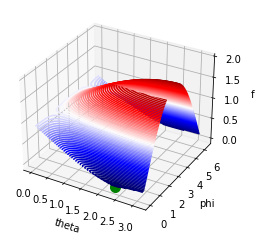

In [4]:
x_bound = [0,np.pi]
y_bound = [0,2*np.pi]
    
xs = np.linspace(x_bound[0], x_bound[1], 1000)
ys = np.linspace(y_bound[0], y_bound[1], 1000)

Xmesh,Ymesh = np.meshgrid(xs, ys)
Zmesh = f([Xmesh,Ymesh])

ax = plt.axes(projection='3d')
ax.contour3D(Xmesh,Ymesh,Zmesh,90,cmap='seismic')
ax.set_xlabel("theta")
ax.set_ylabel("phi")
ax.set_zlabel("f")

ax.scatter(result.x[0],result.x[1],f(result.x),color='green',s=100)

plt.show()

Using the blochplot function from section 6.3, plot the resulting qubit state.

In [5]:
from blochplotter import *

psi = 0.3963411797205216|0> + (0.9116530511494989+0.10863877570901795j)|1>
psi prob = 0.16 , 0.84


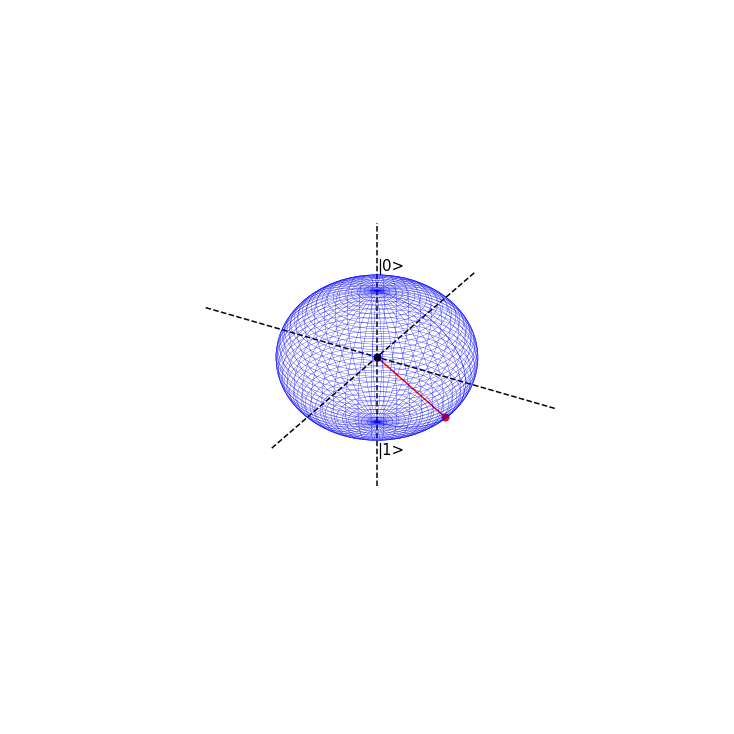

In [6]:
blochplot(result.x[0],result.x[1])

Perform a quantum fourier transform on the above qubit state, blochplot the resulting state

psi = 0.7784389072044564|0> + (0.16641382926457882-0.6052597006077897j)|1>
psi prob = 0.61 , 0.39


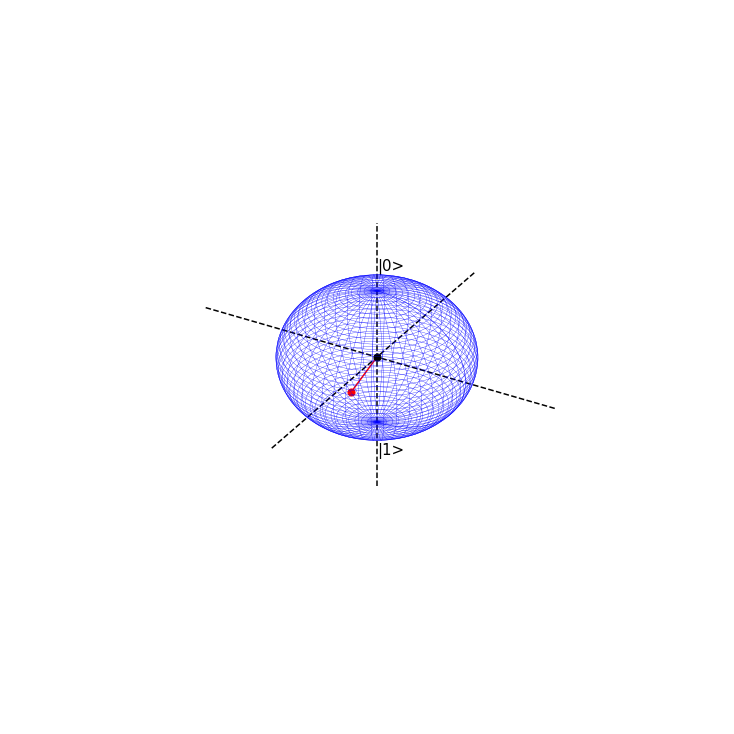

In [11]:
y = 1/np.sqrt(2)*fft(psi)

yresult = parametrise(y)

blochplot(yresult.x[0],yresult.x[1])

Perform another quantum fourier transform of the resulting state. What do you notice?

psi = 0.463813811784351|0> + (0.22846911747194248+0.8559664773574152j)|1>
psi prob = 0.22 , 0.78


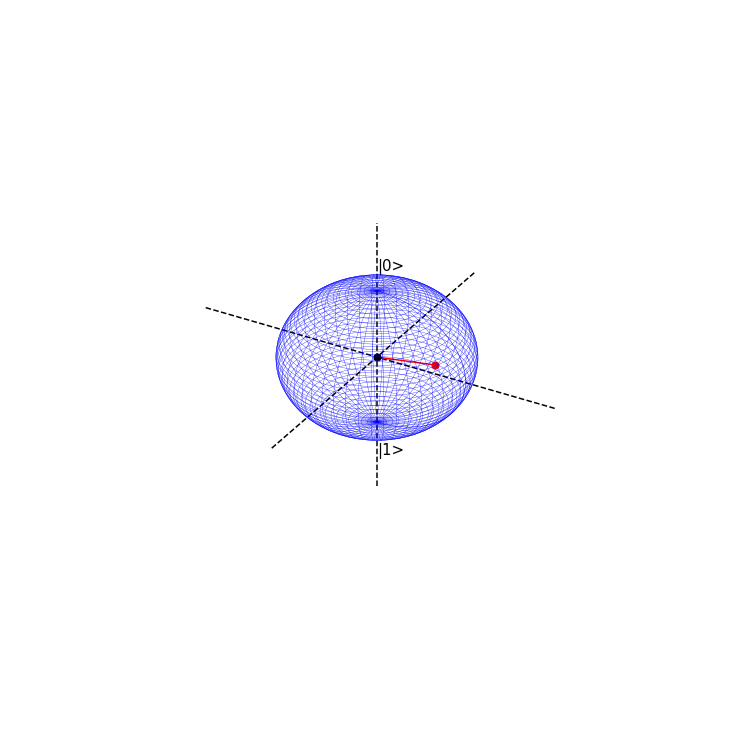

In [12]:
y = 1/np.sqrt(2)*fft(y)

yresult = parametrise(y)

blochplot(yresult.x[0],yresult.x[1])

This is a consequence of the fact that

$$HH = \mathbb{1} $$